**Importing relevant modules:**

In [451]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import re
from sklearn.impute import SimpleImputer

**Reading the CSV File:**

In [452]:
df = pd.read_csv('hollywood.csv')

**Displaying dataframe info:**

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  1000 non-null   int64 
 1   Title                       1000 non-null   object
 2   Movie Info                  1000 non-null   object
 3   Year                        1000 non-null   int64 
 4   Distributor                 999 non-null    object
 5   Budget (in $)               1000 non-null   object
 6   Domestic Opening (in $)     1000 non-null   object
 7   Domestic Sales (in $)       1000 non-null   int64 
 8   International Sales (in $)  1000 non-null   int64 
 9   World Wide Sales (in $)     1000 non-null   int64 
 10  Release Date                1000 non-null   object
 11  Genre                       1000 non-null   object
 12  Running Time                1000 non-null   object
 13  License                     943 non-null    objec

**Displaying tail of dataframe:**

In [454]:
df.tail()

,Unnamed: 0,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
995,995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,30000000,35648740,127223418,53399006,180622424,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min,PG-13
996,996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,69000000,29651193,104029443,76584381,180613824,9-Nov-17,['Comedy'],1 hr 40 min,PG-13
997,997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,40000000,15190758,67209615,113354021,180563636,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min,R
998,998,Deja Vu,"After a ferry is bombed in New Orleans, an A.T...",2006,Walt Disney Studios Motion Pictures,75000000,20574802,64038616,116518934,180557550,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min,PG-13
999,999,M3GAN,A robotics engineer at a toy company builds a ...,2022,Universal Pictures,December 28 2022 (EMEA),30429860,95043350,84925523,179968873,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min,PG-13


**Displaying head of dataframe:**

In [455]:
df.head()

,Unnamed: 0,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
0,0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
1,1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
3,3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min,PG-13
4,4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13


**Describes statistical information of data within dataframe:**

In [456]:
df.describe()

,Unnamed: 0,Year,Domestic Sales (in $),International Sales (in $),World Wide Sales (in $)
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,499.500000,2008.181000,1.646405e+08,2.640890e+08,4.228430e+08
std,288.819436,10.585854,1.197541e+08,2.133847e+08,3.054844e+08
min,0.000000,1937.000000,6.752000e+03,2.450000e+07,1.799689e+08
25%,249.750000,2002.000000,9.572506e+07,1.321190e+08,2.272899e+08
50%,499.500000,2010.000000,1.349169e+08,1.941077e+08,3.197148e+08
75%,749.250000,2016.000000,1.983993e+08,3.188993e+08,4.852363e+08
max,999.000000,2023.000000,9.366622e+08,2.138484e+09,2.923706e+09


**Finding out how many missing entries are in each attribute:**

In [457]:
df.isnull().sum()

,0
Unnamed: 0,0
Title,0
Movie Info,0
Year,0
Distributor,1
Budget (in $),0
Domestic Opening (in $),0
Domestic Sales (in $),0
International Sales (in $),0
World Wide Sales (in $),0


**Displaying entries which have null attributes:**



In [458]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
229,229,WALL·E,"In the distant future, a small waste-collectin...",2008,Walt Disney Studios Motion Pictures,180000000,63087526,223808164,297503726,521311890,26-Jun-08,"['Adventure', 'Animation', 'Family', 'Sci-Fi']",1 hr 38 min,NaN
234,234,Ghost,"After a young man is murdered, his spirit stay...",1990,Paramount Pictures,22000000,12191540,217631306,288072251,505703557,13-Jul-90,"['Drama', 'Fantasy', 'Romance', 'Thriller']",2 hr 7 min,NaN
235,235,Aladdin,A kind-hearted street urchin and a power-hungr...,1992,Walt Disney Studios Motion Pictures,28000000,196664,217350219,286700000,504050219,13-Nov-92,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 30 min,NaN
239,239,Toy Story 2,"When Woody is stolen by a toy collector, Buzz ...",1999,Walt Disney Studios Motion Pictures,90000000,300163,245852179,251523202,497375381,19-Nov-99,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 32 min,NaN
241,241,Twister,"Bill and Jo Harding, advanced storm chasers on...",1996,Warner Bros.,92000000,41059405,241830615,252750000,494580615,10-May-96,"['Action', 'Adventure', 'Thriller']",1 hr 53 min,NaN
257,257,Home Alone,"An eight-year-old troublemaker, mistakenly lef...",1990,Twentieth Century Fox,18000000,17081997,285761243,190923432,476684675,16-Nov-90,"['Comedy', 'Family']",1 hr 43 min,NaN
258,258,Jaws,When a killer shark unleashes chaos on a beach...,1975,Universal Pictures,7000000,7061513,265859065,210653000,476512065,20-Jun-75,"['Adventure', 'Mystery', 'Thriller']",2 hr 4 min,NaN
259,259,Ant-Man and the Wasp: Quantumania,Scott Lang and Hope Van Dyne are dragged into ...,2023,Walt Disney Studios Motion Pictures,February 15 2023 (EMEA APAC),106109650,214504909,261566271,476071180,20-Jun-75,"['Adventure', 'Mystery', 'Thriller']",2 hr 4 min,NaN
276,276,Cars,"On the way to the biggest race of his life, a ...",2006,Walt Disney Studios Motion Pictures,120000000,60119509,244082982,217908885,461991867,8-Jun-06,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 57 min,NaN
277,277,The Eight Hundred,From the acclaimed filmmaker behind Mr. Six co...,2020,CMC Pictures,August 21 2020 (China),118161,372755,461048804,461421559,8-Jun-06,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 57 min,NaN


**Imputing 'Unknown' into missing values in a copy of the dataframe using SimpleImputer module:**

In [459]:
df_copy = df

columns = ['Distributor','License']
imputer = SimpleImputer(strategy='constant', fill_value="Unknown")
imputed_df = pd.DataFrame(imputer.fit_transform(df_copy[columns]), columns=columns)

df_copy[columns] = imputed_df

**Renaming columns into variable names:**

In [460]:
df.rename(columns={ 'Unnamed: 0':'number','Title':'movie_title','Movie Info':'movie_info','Year':'year_released','Distributor':'distributor','Budget (in $)':'budget_in_$','Domestic Opening (in $)':'domestic_opening_in_dollars','Domestic Sales (in $)':'domestic_sales_in_dollars','International Sales (in $)':'international_sales_in_dollars','World Wide Sales (in $)':'world_wide_sales_in_dollars','Release Date':'release_date','Genre':'genre','Running Time':'running_time','License':'license' }, inplace=True)
display(df)

,number,movie_title,movie_info,year_released,distributor,budget_in_$,domestic_opening_in_dollars,domestic_sales_in_dollars,international_sales_in_dollars,world_wide_sales_in_dollars,release_date,genre,running_time,license
0,0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
1,1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
3,3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min,PG-13
4,4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,30000000,35648740,127223418,53399006,180622424,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min,PG-13
996,996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,69000000,29651193,104029443,76584381,180613824,9-Nov-17,['Comedy'],1 hr 40 min,PG-13
997,997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,40000000,15190758,67209615,113354021,180563636,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min,R
998,998,Deja Vu,"After a ferry is bombed in New Orleans, an A.T...",2006,Walt Disney Studios Motion Pictures,75000000,20574802,64038616,116518934,180557550,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min,PG-13


****

**Sets first column to movie_title from number:**

In [461]:
df.set_index(['movie_title'])

,number,movie_info,year_released,distributor,budget_in_$,domestic_opening_in_dollars,domestic_sales_in_dollars,international_sales_in_dollars,world_wide_sales_in_dollars,release_date,genre,running_time,license
movie_title,,,,,,,,,,,,,
Avatar,0,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
Avengers: Endgame,1,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
Avatar: The Way of Water,2,Jake Sully lives with his newfound family form...,2022,20th Century Studios,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
Titanic,3,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min,PG-13
Star Wars: Episode VII - The Force Awakens,4,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sweet Home Alabama,995,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,30000000,35648740,127223418,53399006,180622424,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min,PG-13
Daddy's Home 2,996,Having finally gotten used to each other's exi...,2017,Paramount Pictures,69000000,29651193,104029443,76584381,180613824,9-Nov-17,['Comedy'],1 hr 40 min,PG-13
Hacksaw Ridge,997,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,40000000,15190758,67209615,113354021,180563636,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min,R


**Reset index position:**



In [462]:
df.reset_index()

,index,number,movie_title,movie_info,year_released,distributor,budget_in_$,domestic_opening_in_dollars,domestic_sales_in_dollars,international_sales_in_dollars,world_wide_sales_in_dollars,release_date,genre,running_time,license
0,0,0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
1,1,1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
3,3,3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min,PG-13
4,4,4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,30000000,35648740,127223418,53399006,180622424,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min,PG-13
996,996,996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,69000000,29651193,104029443,76584381,180613824,9-Nov-17,['Comedy'],1 hr 40 min,PG-13
997,997,997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,40000000,15190758,67209615,113354021,180563636,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min,R
998,998,998,Deja Vu,"After a ferry is bombed in New Orleans, an A.T...",2006,Walt Disney Studios Motion Pictures,75000000,20574802,64038616,116518934,180557550,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min,PG-13


**Split the dataframe into two different tables, with movie_info as the primary key:** (Removes the number column as well)

In [463]:
df1 = df.iloc[:,[1,2,3,4,13]]
df2 = df.iloc[:,[1,3,5,6,7,8,9,10,11,12]]

**Display first dataframe:**

In [464]:
display(df1)

,movie_title,movie_info,year_released,distributor,license
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,PG-13
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,PG-13
2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,PG-13
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,PG-13
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,PG-13
...,...,...,...,...,...
995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,PG-13
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,PG-13
997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,R
998,Deja Vu,"After a ferry is bombed in New Orleans, an A.T...",2006,Walt Disney Studios Motion Pictures,PG-13


**Display second dataframe:**

In [465]:
display(df2)

,movie_title,year_released,budget_in_$,domestic_opening_in_dollars,domestic_sales_in_dollars,international_sales_in_dollars,world_wide_sales_in_dollars,release_date,genre,running_time
0,Avatar,2009,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
1,Avengers: Endgame,2019,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
2,Avatar: The Way of Water,2022,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
3,Titanic,1997,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min
4,Star Wars: Episode VII - The Force Awakens,2015,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
...,...,...,...,...,...,...,...,...,...,...
995,Sweet Home Alabama,2002,30000000,35648740,127223418,53399006,180622424,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min
996,Daddy's Home 2,2017,69000000,29651193,104029443,76584381,180613824,9-Nov-17,['Comedy'],1 hr 40 min
997,Hacksaw Ridge,2016,40000000,15190758,67209615,113354021,180563636,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min
998,Deja Vu,2006,75000000,20574802,64038616,116518934,180557550,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min


**Merging back the split dataframe:**

In [466]:
merged_df = pd.merge(df1, df2, on=['movie_title','year_released'])

**Displaying merged dataframe:**

In [467]:
display(merged_df)

,movie_title,movie_info,year_released,distributor,license,budget_in_$,domestic_opening_in_dollars,domestic_sales_in_dollars,international_sales_in_dollars,world_wide_sales_in_dollars,release_date,genre,running_time
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,PG-13,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,PG-13,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,PG-13,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,PG-13,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,PG-13,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,PG-13,30000000,35648740,127223418,53399006,180622424,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,PG-13,69000000,29651193,104029443,76584381,180613824,9-Nov-17,['Comedy'],1 hr 40 min
997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,R,40000000,15190758,67209615,113354021,180563636,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min
998,Deja Vu,"After a ferry is bombed in New Orleans, an A.T...",2006,Walt Disney Studios Motion Pictures,PG-13,75000000,20574802,64038616,116518934,180557550,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min


**Concatenate both datasets:**

In [468]:
concat_df = pd.concat([df1, df2],axis=1)

**Display concatenated datasets:**

In [469]:
display(concat_df)

,movie_title,movie_info,year_released,distributor,license,movie_title,year_released,budget_in_$,domestic_opening_in_dollars,domestic_sales_in_dollars,international_sales_in_dollars,world_wide_sales_in_dollars,release_date,genre,running_time
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,PG-13,Avatar,2009,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,PG-13,Avengers: Endgame,2019,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,PG-13,Avatar: The Way of Water,2022,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,PG-13,Titanic,1997,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,PG-13,Star Wars: Episode VII - The Force Awakens,2015,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,PG-13,Sweet Home Alabama,2002,30000000,35648740,127223418,53399006,180622424,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,PG-13,Daddy's Home 2,2017,69000000,29651193,104029443,76584381,180613824,9-Nov-17,['Comedy'],1 hr 40 min
997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,R,Hacksaw Ridge,2016,40000000,15190758,67209615,113354021,180563636,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min
998,Deja Vu,"After a ferry is bombed in New Orleans, an A.T...",2006,Walt Disney Studios Motion Pictures,PG-13,Deja Vu,2006,75000000,20574802,64038616,116518934,180557550,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min


**Round monetary values into millions using apply function**

In [470]:
def convert_to_millions(x):
    try:
        x_numeric = float(x)
        return round(x_numeric / 1000000, 2)
    except (ValueError, TypeError):
        return None

columns_to_update = [
    'budget_in_$',
    'domestic_opening_in_dollars',
    'domestic_sales_in_dollars',
    'international_sales_in_dollars',
    'world_wide_sales_in_dollars'
]

for column in columns_to_update:
    merged_df[column] = merged_df[column].apply(convert_to_millions)

display(merged_df)

,movie_title,movie_info,year_released,distributor,license,budget_in_$,domestic_opening_in_dollars,domestic_sales_in_dollars,international_sales_in_dollars,world_wide_sales_in_dollars,release_date,genre,running_time
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,PG-13,237.0,77.03,785.22,2138.48,2923.71,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,PG-13,356.0,357.12,858.37,1941.07,2799.44,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,PG-13,NaN,134.10,684.08,1636.17,2320.25,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,PG-13,200.0,28.64,674.29,1590.45,2264.74,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,PG-13,245.0,247.97,936.66,1134.65,2071.31,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,PG-13,30.0,35.65,127.22,53.40,180.62,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,PG-13,69.0,29.65,104.03,76.58,180.61,9-Nov-17,['Comedy'],1 hr 40 min
997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,R,40.0,15.19,67.21,113.35,180.56,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min
998,Deja Vu,"After a ferry is bombed in New Orleans, an A.T...",2006,Walt Disney Studios Motion Pictures,PG-13,75.0,20.57,64.04,116.52,180.56,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min


**Renaming columns to formatted names:**

In [471]:
rename_dict = {
    'budget_in_$': 'budget_in_million_dollars',
    'domestic_opening_in_dollars': 'domestic_opening_in_million_dollars',
    'domestic_sales_in_dollars': 'domestic_sales_in_million_dollars',
    'international_sales_in_dollars': 'international_sales_in_million_dollars',
    'world_wide_sales_in_dollars': 'world_wide_sales_in_million_dollars'
}

merged_df.rename(columns=rename_dict, inplace=True)
display(merged_df)

,movie_title,movie_info,year_released,distributor,license,budget_in_million_dollars,domestic_opening_in_million_dollars,domestic_sales_in_million_dollars,international_sales_in_million_dollars,world_wide_sales_in_million_dollars,release_date,genre,running_time
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,PG-13,237.0,77.03,785.22,2138.48,2923.71,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,PG-13,356.0,357.12,858.37,1941.07,2799.44,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,PG-13,NaN,134.10,684.08,1636.17,2320.25,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,PG-13,200.0,28.64,674.29,1590.45,2264.74,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,PG-13,245.0,247.97,936.66,1134.65,2071.31,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,PG-13,30.0,35.65,127.22,53.40,180.62,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,PG-13,69.0,29.65,104.03,76.58,180.61,9-Nov-17,['Comedy'],1 hr 40 min
997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,R,40.0,15.19,67.21,113.35,180.56,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min
998,Deja Vu,"After a ferry is bombed in New Orleans, an A.T...",2006,Walt Disney Studios Motion Pictures,PG-13,75.0,20.57,64.04,116.52,180.56,22-Nov-06,"['Action', 'Crime', 'Sci-Fi', 'Thriller']",2 hr 6 min


**Filtering out dirty distributor entries using regex:**

In [472]:
x = 0
for i in merged_df.itertuples():
    distributor = re.findall("January|February|March|April|May|June|July|August|September|October|November|December|[$]", str(i[4]))
    if distributor:
      merged_df["distributor"][x] = None
    x+=1

<ipython-input-472-a46203513860>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_df["distributor"][x] = None
<ipython-input-472-a46203513860>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

**Recheck how many empty variables for each column:**

In [473]:
merged_df.isnull().sum()

,0
movie_title,0
movie_info,0
year_released,0
distributor,34
license,0
budget_in_million_dollars,215
domestic_opening_in_million_dollars,28
domestic_sales_in_million_dollars,0
international_sales_in_million_dollars,0
world_wide_sales_in_million_dollars,0


**Dropping dirty entries after setting invalid fields to NaN:**

In [474]:
display(merged_df.dropna(inplace=True))

None

In [475]:
merged_df.isnull().sum()
display(merged_df)

,movie_title,movie_info,year_released,distributor,license,budget_in_million_dollars,domestic_opening_in_million_dollars,domestic_sales_in_million_dollars,international_sales_in_million_dollars,world_wide_sales_in_million_dollars,release_date,genre,running_time
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,PG-13,237.0,77.03,785.22,2138.48,2923.71,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,PG-13,356.0,357.12,858.37,1941.07,2799.44,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,PG-13,200.0,28.64,674.29,1590.45,2264.74,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,PG-13,245.0,247.97,936.66,1134.65,2071.31,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
7,Jurassic World,"A new theme park, built on the original site o...",2015,Universal Pictures,PG-13,150.0,208.81,653.41,1018.13,1671.54,10-Jun-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,The Scorpion King,A desert warrior rises up against the evil arm...,2002,Universal Pictures,PG-13,60.0,36.08,91.05,89.58,180.63,18-Apr-02,"['Action', 'Adventure', 'Fantasy']",1 hr 32 min
995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,PG-13,30.0,35.65,127.22,53.40,180.62,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,PG-13,69.0,29.65,104.03,76.58,180.61,9-Nov-17,['Comedy'],1 hr 40 min
997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,R,40.0,15.19,67.21,113.35,180.56,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min


**Display budget histogram:**

<Axes: >

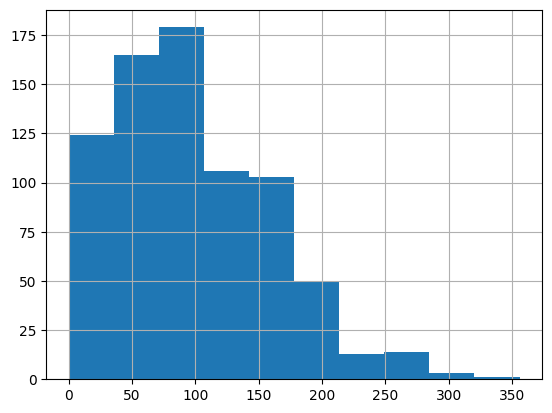

In [476]:
merged_df['budget_in_million_dollars'].hist()

**Query for Movies with budgets between interquartile range:**

In [477]:
quartile_1 = merged_df['budget_in_million_dollars'].quantile(0.25)
quartile_2 = merged_df['budget_in_million_dollars'].quantile(0.75)


display(merged_df.query('@quartile_1 <= budget_in_million_dollars <= @quartile_2'))

,movie_title,movie_info,year_released,distributor,license,budget_in_million_dollars,domestic_opening_in_million_dollars,domestic_sales_in_million_dollars,international_sales_in_million_dollars,world_wide_sales_in_million_dollars,release_date,genre,running_time
25,Minions,"Minions Stuart, Kevin, and Bob are recruited b...",2015,Universal Pictures,PG,74.0,115.72,336.05,823.40,1159.44,9-Apr-15,"['Adventure', 'Animation', 'Comedy', 'Crime', ...",1 hr 31 min
28,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003,New Line Cinema,PG-13,94.0,72.63,379.43,768.21,1147.63,17-Dec-03,"['Action', 'Adventure', 'Drama', 'Fantasy']",3 hr 21 min
33,Jurassic Park,A pragmatic paleontologist touring an almost c...,1993,Universal Pictures,PG-13,63.0,47.03,407.19,705.95,1113.14,11-Jun-93,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",2 hr 7 min
37,Joker,"During the 1980's, a failed stand-up comedian ...",2019,Warner Bros.,R,55.0,96.20,335.48,738.98,1074.46,2-Oct-19,"['Crime', 'Drama', 'Thriller']",2 hr 2 min
44,Despicable Me 3,"Gru meets his long-lost, charming, cheerful, a...",2017,Universal Pictures,PG,80.0,72.43,264.62,770.18,1034.80,14-Jun-17,"['Adventure', 'Animation', 'Comedy', 'Crime', ...",1 hr 29 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,The Haunted Mansion,A realtor and his wife and children are summon...,2003,Walt Disney Studios Motion Pictures,PG,90.0,24.28,75.85,106.44,182.29,26-Nov-03,"['Comedy', 'Family', 'Fantasy', 'Horror', 'Mys...",1 hr 39 min
992,Road to Perdition,A mob enforcer's son in 1930s Illinois witness...,2002,DreamWorks Distribution,R,80.0,22.08,104.45,76.55,181.00,12-Jul-02,"['Crime', 'Drama', 'Thriller']",1 hr 57 min
994,The Scorpion King,A desert warrior rises up against the evil arm...,2002,Universal Pictures,PG-13,60.0,36.08,91.05,89.58,180.63,18-Apr-02,"['Action', 'Adventure', 'Fantasy']",1 hr 32 min
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,PG-13,69.0,29.65,104.03,76.58,180.61,9-Nov-17,['Comedy'],1 hr 40 min


**Grouping movies by distributors and compiling amount of movies per listed distributor:**

In [478]:
grouped_df_distributor = merged_df.groupby('distributor').agg(
    number_of_movies=('movie_title', 'count'),
    movie_titles=('movie_title',list)).reset_index()

display(grouped_df_distributor)

,distributor,number_of_movies,movie_titles
0,Artisan Entertainment,1,[The Blair Witch Project]
1,Columbia Pictures,3,"[Ghostbusters, A Few Good Men, Bram Stoker's D..."
2,Dimension Films,3,"[Paddington, Scary Movie 3, Spy Kids 3: Game O..."
3,DreamWorks,16,"[Transformers: Dark of the Moon, Transformers:..."
4,DreamWorks Distribution,15,"[Shrek 2, Gladiator, Shrek, Saving Private Rya..."
5,Focus Features,2,"[London Has Fallen, Downton Abbey]"
6,Fox Searchlight,5,"[Slumdog Millionaire, Black Swan, The Full Mon..."
7,Gramercy Pictures (I),2,"[Bean, Four Weddings and a Funeral]"
8,IFC Films,1,[My Big Fat Greek Wedding]
9,Lionsgate,16,"[The Hunger Games: Catching Fire, The Twilight..."


**Using aggregate to show averages:**

In [479]:
print(merged_df['budget_in_million_dollars'].agg(['min', 'max', 'median','sum']))

min           0.01
max         356.00
median       86.50
sum       74403.27
Name: budget_in_million_dollars, dtype: float64


**Using melt to rearrange data:**

In [480]:
df_melted = pd.melt(merged_df, id_vars=["movie_title", "year_released"], value_vars=["world_wide_sales_in_million_dollars"], var_name = "Attribute")
display(df_melted)

df_frozen = df_melted.pivot(index=["movie_title", "year_released"], columns=["Attribute"])

df_frozen = df_frozen['value'].reset_index()
df_frozen.columns.name = None
display(df_frozen)

,movie_title,year_released,Attribute,value
0,Avatar,2009,world_wide_sales_in_million_dollars,2923.71
1,Avengers: Endgame,2019,world_wide_sales_in_million_dollars,2799.44
2,Titanic,1997,world_wide_sales_in_million_dollars,2264.74
3,Star Wars: Episode VII - The Force Awakens,2015,world_wide_sales_in_million_dollars,2071.31
4,Jurassic World,2015,world_wide_sales_in_million_dollars,1671.54
...,...,...,...,...
753,The Scorpion King,2002,world_wide_sales_in_million_dollars,180.63
754,Sweet Home Alabama,2002,world_wide_sales_in_million_dollars,180.62
755,Daddy's Home 2,2017,world_wide_sales_in_million_dollars,180.61
756,Hacksaw Ridge,2016,world_wide_sales_in_million_dollars,180.56


,movie_title,year_released,world_wide_sales_in_million_dollars
0,"10,000 BC",2008,269.78
1,102 Dalmatians,2000,183.61
2,12 Years a Slave,2013,187.73
3,1917,2019,384.58
4,2 Fast 2 Furious,2003,236.35
...,...,...,...
753,Yogi Bear,2010,203.51
754,You Don't Mess with the Zohan,2008,204.31
755,You've Got Mail,1998,250.82
756,xXx,2002,277.45


**Changing panda's display settings:**

In [481]:
pd.set_option("display.max_rows", 11)
pd.set_option("display.max_columns", 6)

In [482]:
display(merged_df)

,movie_title,movie_info,year_released,...,release_date,genre,running_time
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,...,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,...,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,...,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,...,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
7,Jurassic World,"A new theme park, built on the original site o...",2015,...,10-Jun-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min
...,...,...,...,...,...,...,...
994,The Scorpion King,A desert warrior rises up against the evil arm...,2002,...,18-Apr-02,"['Action', 'Adventure', 'Fantasy']",1 hr 32 min
995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,...,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,...,9-Nov-17,['Comedy'],1 hr 40 min
997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,...,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min


**Resetting options:**

In [483]:
pd.reset_option("all")

<ipython-input-483-815ccf52250a>:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")
<ipython-input-483-815ccf52250a>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")


**Check if settings reset:**

In [484]:
display(merged_df)

,movie_title,movie_info,year_released,distributor,license,budget_in_million_dollars,domestic_opening_in_million_dollars,domestic_sales_in_million_dollars,international_sales_in_million_dollars,world_wide_sales_in_million_dollars,release_date,genre,running_time
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,PG-13,237.0,77.03,785.22,2138.48,2923.71,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,PG-13,356.0,357.12,858.37,1941.07,2799.44,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,PG-13,200.0,28.64,674.29,1590.45,2264.74,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,PG-13,245.0,247.97,936.66,1134.65,2071.31,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min
7,Jurassic World,"A new theme park, built on the original site o...",2015,Universal Pictures,PG-13,150.0,208.81,653.41,1018.13,1671.54,10-Jun-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,The Scorpion King,A desert warrior rises up against the evil arm...,2002,Universal Pictures,PG-13,60.0,36.08,91.05,89.58,180.63,18-Apr-02,"['Action', 'Adventure', 'Fantasy']",1 hr 32 min
995,Sweet Home Alabama,A young woman who has reinvented herself as a ...,2002,Walt Disney Studios Motion Pictures,PG-13,30.0,35.65,127.22,53.40,180.62,27-Sep-02,"['Comedy', 'Romance']",1 hr 48 min
996,Daddy's Home 2,Having finally gotten used to each other's exi...,2017,Paramount Pictures,PG-13,69.0,29.65,104.03,76.58,180.61,9-Nov-17,['Comedy'],1 hr 40 min
997,Hacksaw Ridge,World War II American Army Medic Desmond T. Do...,2016,Lionsgate,R,40.0,15.19,67.21,113.35,180.56,3-Nov-16,"['Biography', 'Drama', 'History', 'War']",2 hr 19 min
